                Seguro de Saúde 
                
Os conjuntos de dados que vou usar neste projeto contêm dados sobre planos de saúde e odontológicos oferecidos a indivíduos e pequenas empresas por meio do US Health Insurance Marketplace. Esses dados foram originalmente preparados e divulgados pelo Centers for Medicare & Medicaid Services (CMS), que faz parte do Departamento de Saúde e Serviços Humanos dos EUA (HHS).

Data Wrangling


vou utilizar dois conjuntos de dados: 1- Taxa de conjunto de dados e 2- Conjunto de dados de atributos do plano

In [1]:
import pandas as pd
import zipfile
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
from pylab import rcParams
rcParams['figure.figsize'] = 15, 10

%matplotlib inline

Lendo o DataSet

In [2]:
Rate_Raw = pd.read_csv("Rate.csv")
Rate_Raw.head(3)

,BusinessYear,StateCode,IssuerId,SourceName,VersionNum,ImportDate,IssuerId2,FederalTIN,RateEffectiveDate,RateExpirationDate,...,IndividualRate,IndividualTobaccoRate,Couple,PrimarySubscriberAndOneDependent,PrimarySubscriberAndTwoDependents,PrimarySubscriberAndThreeOrMoreDependents,CoupleAndOneDependent,CoupleAndTwoDependents,CoupleAndThreeOrMoreDependents,RowNumber
0,2014,AK,21989,HIOS,6,2014-03-19 07:06:49,21989,93-0438772,2014-01-01,2014-12-31,...,29.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14
1,2014,AK,21989,HIOS,6,2014-03-19 07:06:49,21989,93-0438772,2014-01-01,2014-12-31,...,36.95,NaN,73.9,107.61,107.61,107.61,144.56,144.56,144.56,14
2,2014,AK,21989,HIOS,6,2014-03-19 07:06:49,21989,93-0438772,2014-01-01,2014-12-31,...,36.95,NaN,73.9,107.61,107.61,107.61,144.56,144.56,144.56,15


escolhendo os recursos que vou utilizar

In [3]:
Rate_Data = Rate_Raw[['BusinessYear','StateCode','IssuerId','ImportDate','PlanId','Age','IndividualRate','Couple',
                    'CoupleAndOneDependent','CoupleAndTwoDependents','CoupleAndThreeOrMoreDependents']]
Rate_Data.head(3)

,BusinessYear,StateCode,IssuerId,ImportDate,PlanId,Age,IndividualRate,Couple,CoupleAndOneDependent,CoupleAndTwoDependents,CoupleAndThreeOrMoreDependents
0,2014,AK,21989,2014-03-19 07:06:49,21989AK0010001,0-20,29.00,NaN,NaN,NaN,NaN
1,2014,AK,21989,2014-03-19 07:06:49,21989AK0020001,Family Option,36.95,73.9,144.56,144.56,144.56
2,2014,AK,21989,2014-03-19 07:06:49,21989AK0020001,Family Option,36.95,73.9,144.56,144.56,144.56


exportando outro quadro de dados que esta em outro arquivo

In [4]:
teste=Rate_Data.to_csv("Rate_Date.csv")

Agora leio o conjunto de dados de atributos do plano

In [188]:
PlanAttributes_Raw = pd.read_csv("PlanAttributes.csv")
PlanAttributes_Raw.head(3)

/home/rielson/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning:

Columns (0,7,8,9,10,11,12,13,14,15,18,19,20,22,23,24,25,26,27,28,29,31,32,33,34,39,40,41,42,66,67,68,70,71,72,75,76,77,79,80,81,82,84,85,86,88,89,90,92,93,94,96,97,98,136,137,138,140,141,142,145,146,147,150,151,152,154,155,156,158,159,160,162,163,164,166,167,168) have mixed types. Specify dtype option on import or set low_memory=False.



,AVCalculatorOutputNumber,BeginPrimaryCareCostSharingAfterNumberOfVisits,BeginPrimaryCareDeductibleCoinsuranceAfterNumberOfCopays,BenefitPackageId,BusinessYear,CSRVariationType,ChildOnlyOffering,ChildOnlyPlanId,CompositeRatingOffered,DEHBCombInnOonFamilyMOOP,...,TEHBOutOfNetFamilyMOOP,TEHBOutOfNetFamilyPerGroupMOOP,TEHBOutOfNetFamilyPerPersonMOOP,TEHBOutOfNetIndividualMOOP,TIN,URLForEnrollmentPayment,URLForSummaryofBenefitsCoverage,UniquePlanDesign,VersionNum,WellnessProgramOffered
0,NaN,0,0,1,2014,Standard Low Off Exchange Plan,Allows Adult and Child-Only,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,93-0438772,https://www.modahealth.com/employers/enroll.shtml,https://www.modahealth.com/producers/grp/den.s...,NaN,6,NaN
1,NaN,0,0,1,2014,Standard Low On Exchange Plan,Allows Adult and Child-Only,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,93-0438772,https://www.modahealth.com/employers/enroll.shtml,https://www.modahealth.com/producers/grp/den.s...,NaN,6,NaN
2,NaN,0,0,1,2014,Standard High Off Exchange Plan,Allows Adult and Child-Only,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,93-0438772,https://www.modahealth.com/employers/enroll.shtml,https://www.modahealth.com/producers/grp/den.s...,NaN,6,NaN


Escolhendo os recursos que vou utilizar

In [6]:
PlanAttributes_Data=PlanAttributes_Raw[['BusinessYear','StateCode','IssuerId','ImportDate','PlanId','MetalLevel',
                                        'TEHBInnTier1FamilyMOOP','TEHBInnTier1IndividualMOOP']]
PlanAttributes_Data.head(3)

,BusinessYear,StateCode,IssuerId,ImportDate,PlanId,MetalLevel,TEHBInnTier1FamilyMOOP,TEHBInnTier1IndividualMOOP
0,2014,AK,21989,2014-03-19 07:06:49,21989AK0020002-00,Low,NaN,NaN
1,2014,AK,21989,2014-03-19 07:06:49,21989AK0020002-01,Low,NaN,NaN
2,2014,AK,21989,2014-03-19 07:06:49,21989AK0020001-00,High,NaN,NaN


Exportando o quadro de dados que está em outro arquivo

In [7]:
PlanAttributes_Data.to_csv("PlanAttributes_data.csv")

Avaliando o conjunto de dados

Agora posso utilizar o arquivo Rate_Data diretamente

In [8]:
RateData=pd.read_csv("Rate_Date.csv")
RateData.head(3)

,Unnamed: 0,BusinessYear,StateCode,IssuerId,ImportDate,PlanId,Age,IndividualRate,Couple,CoupleAndOneDependent,CoupleAndTwoDependents,CoupleAndThreeOrMoreDependents
0,0,2014,AK,21989,2014-03-19 07:06:49,21989AK0010001,0-20,29.00,NaN,NaN,NaN,NaN
1,1,2014,AK,21989,2014-03-19 07:06:49,21989AK0020001,Family Option,36.95,73.9,144.56,144.56,144.56
2,2,2014,AK,21989,2014-03-19 07:06:49,21989AK0020001,Family Option,36.95,73.9,144.56,144.56,144.56


Limpando os dados com taxa acima de 9.000

In [9]:
RateData[RateData.IndividualRate>9000].IndividualRate.unique()

array([999999.  ,   9999.  ,   9999.99])

In [10]:
RateData = RateData[RateData.IndividualRate < 9000]
RateData.head(3)

,Unnamed: 0,BusinessYear,StateCode,IssuerId,ImportDate,PlanId,Age,IndividualRate,Couple,CoupleAndOneDependent,CoupleAndTwoDependents,CoupleAndThreeOrMoreDependents
0,0,2014,AK,21989,2014-03-19 07:06:49,21989AK0010001,0-20,29.00,NaN,NaN,NaN,NaN
1,1,2014,AK,21989,2014-03-19 07:06:49,21989AK0020001,Family Option,36.95,73.9,144.56,144.56,144.56
2,2,2014,AK,21989,2014-03-19 07:06:49,21989AK0020001,Family Option,36.95,73.9,144.56,144.56,144.56


Vou fazer a análise dos planos opções familiares, por isso que eu exclui todos os planos que são para idades especiais

In [11]:
RateData_FO = RateData[RateData.Age == "Family Option"]
RateData_FO.head(3)

,Unnamed: 0,BusinessYear,StateCode,IssuerId,ImportDate,PlanId,Age,IndividualRate,Couple,CoupleAndOneDependent,CoupleAndTwoDependents,CoupleAndThreeOrMoreDependents
1,1,2014,AK,21989,2014-03-19 07:06:49,21989AK0020001,Family Option,36.95,73.9,144.56,144.56,144.56
2,2,2014,AK,21989,2014-03-19 07:06:49,21989AK0020001,Family Option,36.95,73.9,144.56,144.56,144.56
5,5,2014,AK,21989,2014-03-19 07:06:49,21989AK0020001,Family Option,36.95,73.9,144.56,144.56,144.56


Vou mudar a coluna ImportDate para date time

In [187]:
RateData_FO['ImportDate']=RateData_FO['ImportDate'].apply(pd.to_datetime)

Como não vou utilizar a coluna Unnamed: 0 vou apagar

In [15]:
RateData_FO=RateData_FO.drop(RateData_FO[['Unnamed: 0']], 1)
RateData_FO.head(3)

,BusinessYear,StateCode,IssuerId,ImportDate,PlanId,Age,IndividualRate,Couple,CoupleAndOneDependent,CoupleAndTwoDependents,CoupleAndThreeOrMoreDependents
1,2014,AK,21989,2014-03-19 07:06:49,21989AK0020001,Family Option,36.95,73.9,144.56,144.56,144.56
2,2014,AK,21989,2014-03-19 07:06:49,21989AK0020001,Family Option,36.95,73.9,144.56,144.56,144.56
5,2014,AK,21989,2014-03-19 07:06:49,21989AK0020001,Family Option,36.95,73.9,144.56,144.56,144.56


O conjunto de dados Rate é adequado para ser utilizado na visualização e na previsão

In [16]:
RateData_FO_1=RateData_FO
RateData_FO_2=RateData_FO
RateData_FO_3=RateData_FO

Plan Attributes Dataset

### Fazendo a limpeza dos dados Plan Attributes

lendos os dados

In [186]:
PlanAttributesData = pd.read_csv("PlanAttributes_data.csv")
PlanAttributesData.head(3)

/home/rielson/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning:

Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.



,Unnamed: 0,BusinessYear,StateCode,IssuerId,ImportDate,PlanId,MetalLevel,TEHBInnTier1FamilyMOOP,TEHBInnTier1IndividualMOOP
0,0,2014,AK,21989,2014-03-19 07:06:49,21989AK0020002-00,Low,NaN,NaN
1,1,2014,AK,21989,2014-03-19 07:06:49,21989AK0020002-01,Low,NaN,NaN
2,2,2014,AK,21989,2014-03-19 07:06:49,21989AK0020001-00,High,NaN,NaN


Existe alguns dados invaliddos na caluna TEHBInnTier1FamilyMOOP verificando se existe informações validas

In [18]:
PlanAttributesData.TEHBInnTier1FamilyMOOP.unique()

array([nan, '$12,700', '$8,000', '$0', '$9,500', '$12,000', '$10,400',
       '$2,500', '$1,000', '$10,000', '$1,500', '$7,000', '$3,000',
       '$12,600', '$6,000', '$3,500', '$2,900', '$2,000', '$4,000',
       '$12,500', '$11,000', '$9,600', '$9,000', '$4,500', '$5,500',
       '$2,200', 'Not Applicable', '$2,800', '$1,150', '$1,240', '$5,000',
       '$2,350', '$8,500', '$5,400', '$8,400', '$1,600', '$800', '$5,200',
       '$1,200', '$2,400', '$4,200', '$6,400', '$3,800', '$7,200',
       '$6,500', '$2,300', '$1,300', '$9,200', '$8,800', '$11,500',
       '$2,700', '$5,300', '$10,500', '$4,300', '$1,400', '$950',
       '$7,300', '$5,840', '$9,800', '$8,200', '$3,400', '$5,600',
       '$7,500', '$6,250', '$7,050', '$6,300', '$4,700', '$3,200',
       '$9,300', '$1,100', '$10,200', '$10,300', '$7,700', '$3,100',
       '$9,750', '$9,100', '$12,200', '$4,400', '$9,400', '$7,400',
       '$11,200', '$700', '$400', '$2,600', '$4,600', '$3,300', '$7,900',
       '$11,400', '$10,600',

Existe alguns caracteres do $ dólar e ','. Agora vou limpar esses dados

In [19]:
PlanAttributesData['TEHBInnTier1FamilyMOOP']=PlanAttributesData['TEHBInnTier1FamilyMOOP'].str.replace('$','').str.replace(',','')
PlanAttributesData.head(3)

,Unnamed: 0,BusinessYear,StateCode,IssuerId,ImportDate,PlanId,MetalLevel,TEHBInnTier1FamilyMOOP,TEHBInnTier1IndividualMOOP
0,0,2014,AK,21989,2014-03-19 07:06:49,21989AK0020002-00,Low,NaN,NaN
1,1,2014,AK,21989,2014-03-19 07:06:49,21989AK0020002-01,Low,NaN,NaN
2,2,2014,AK,21989,2014-03-19 07:06:49,21989AK0020001-00,High,NaN,NaN


Apagando todas as linhas que não são aplicaveis

In [20]:
PlanAttributesData=PlanAttributesData.drop(PlanAttributesData[PlanAttributesData['TEHBInnTier1FamilyMOOP']=='Not Applicable'].index)

Excluindo todos os NAN

In [21]:
PlanAttributesData['TEHBInnTier1FamilyMOOP']=PlanAttributesData['TEHBInnTier1FamilyMOOP'].fillna(99999999)

In [22]:
PlanAttributesData=PlanAttributesData.drop(PlanAttributesData[PlanAttributesData['TEHBInnTier1FamilyMOOP']==99999999].index)

Mudando a coluna ImportDate para date time

In [23]:
PlanAttributesData['ImportDate']=PlanAttributesData['ImportDate'].apply(pd.to_datetime)

Alterando o TEHBInnTier1FamilyMOOP para Family_Up_Limit

In [24]:
PlanAttributesData['Family_Up_Limit']=''

In [26]:
for x in PlanAttributesData.index:
    PlanAttributesData.ix[x,"Family_Up_Limit"]=float(PlanAttributesData.ix[x,'TEHBInnTier1FamilyMOOP'])
PlanAttributesData['Family_Up_Limit']=PlanAttributesData['Family_Up_Limit'].astype(int)

Alterando TEHBInnTier1IndividualMOOP para Individual_Up_Limit

In [27]:
PlanAttributesData['TEHBInnTier1IndividualMOOP']=PlanAttributesData['TEHBInnTier1IndividualMOOP'].str.replace('$','').str.replace(',','')
PlanAttributesData['Individual_Up_Limit']=''
for x in PlanAttributesData.index:
    PlanAttributesData.ix[x,"Individual_Up_Limit"]=float(PlanAttributesData.ix[x,'TEHBInnTier1IndividualMOOP'])
PlanAttributesData['Individual_Up_Limit']=PlanAttributesData['Individual_Up_Limit'].astype(int) # Transfer object to int
PlanAttributesData.head(3)

,Unnamed: 0,BusinessYear,StateCode,IssuerId,ImportDate,PlanId,MetalLevel,TEHBInnTier1FamilyMOOP,TEHBInnTier1IndividualMOOP,Family_Up_Limit,Individual_Up_Limit
6,6,2014,AK,73836,2014-04-18 11:49:29,73836AK0650002-00,Bronze,12700,6350,12700,6350
7,7,2014,AK,73836,2014-04-18 11:49:29,73836AK0680004-00,Gold,8000,4000,8000,4000
8,8,2014,AK,73836,2014-04-18 11:49:29,73836AK0680004-01,Gold,8000,4000,8000,4000


Apagando as colunas que não vão ser uteis

In [28]:
PlanAttributesData=PlanAttributesData.drop(PlanAttributesData[['TEHBInnTier1FamilyMOOP','TEHBInnTier1IndividualMOOP']],1)
PlanAttributesData.head(3)

,Unnamed: 0,BusinessYear,StateCode,IssuerId,ImportDate,PlanId,MetalLevel,Family_Up_Limit,Individual_Up_Limit
6,6,2014,AK,73836,2014-04-18 11:49:29,73836AK0650002-00,Bronze,12700,6350
7,7,2014,AK,73836,2014-04-18 11:49:29,73836AK0680004-00,Gold,8000,4000
8,8,2014,AK,73836,2014-04-18 11:49:29,73836AK0680004-01,Gold,8000,4000


In [29]:
PlanAttributesData=PlanAttributesData.drop(PlanAttributesData[['Unnamed: 0']],1)
PlanAttributesData.head(3)

,BusinessYear,StateCode,IssuerId,ImportDate,PlanId,MetalLevel,Family_Up_Limit,Individual_Up_Limit
6,2014,AK,73836,2014-04-18 11:49:29,73836AK0650002-00,Bronze,12700,6350
7,2014,AK,73836,2014-04-18 11:49:29,73836AK0680004-00,Gold,8000,4000
8,2014,AK,73836,2014-04-18 11:49:29,73836AK0680004-01,Gold,8000,4000


In [30]:
PlanAttributesData_1=PlanAttributesData
PlanAttributesData_2=PlanAttributesData
PlanAttributesData_3=PlanAttributesData

### Visualização

In [31]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(style="ticks")
from pylab import rcParams
%matplotlib inline
matplotlib.style.use('ggplot')
rcParams['figure.figsize'] = 15, 10
rcParams['font.size'] = 20
rcParams['axes.facecolor'] = 'white'

### Análise Family Up Limit (KDE)


Observando os dados pude ver que tem algumas familias que pagam os seus planos de saúde com o seu proprio dinheiro. Vamos analisar esses dados com o KDE.

(0, 13500)

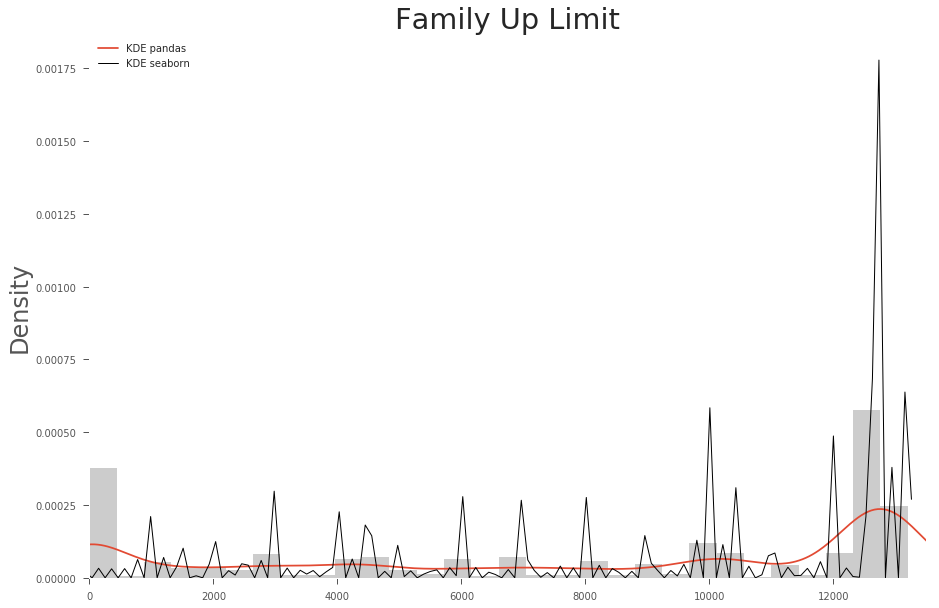

In [32]:
fig, ax = plt.subplots(figsize=(15,10))
PlanAttributesData_3.Family_Up_Limit.hist(bins=30, normed=True, alpha=0.4, color='grey')
PlanAttributesData_3.Family_Up_Limit.plot(kind='kde', title='Family Up Limit', label='KDE pandas')
sns.kdeplot(PlanAttributesData_3.Family_Up_Limit, bw=20, color='black', lw=1.0, label='KDE seaborn')
plt.xlim([0,13500])

##### Como mostra o gráfico do KDE os limites 0 são de pessoas que não podem pagar por um plano. podemos observar que a maioria dos limites é superior a 12000, o que significa que os seguradores focam em planos high-end. Talvez seja por isso que os americanos gastam muito dinheiro em seguro de saúde.

Vamos verificar a tendencia entre os anos. Foi barato, mais caro ou estável?

In [33]:
date_object1 = pd.to_datetime(PlanAttributesData_1['ImportDate'])
PlanAttributesData_1['weekday'] = date_object1.dt.dayofweek
PlanAttributesData_1['month'] = date_object1.dt.month
PlanAttributesData_1['year'] = date_object1.dt.year
PlanAttributesData_1['hour'] = date_object1.dt.hour
PlanAttributesData_1['minute'] = date_object1.dt.minute
PlanAttributesData_1['second'] = date_object1.dt.second

Vamos utilizar o GroupBy para obter os valores medianos entre os anos

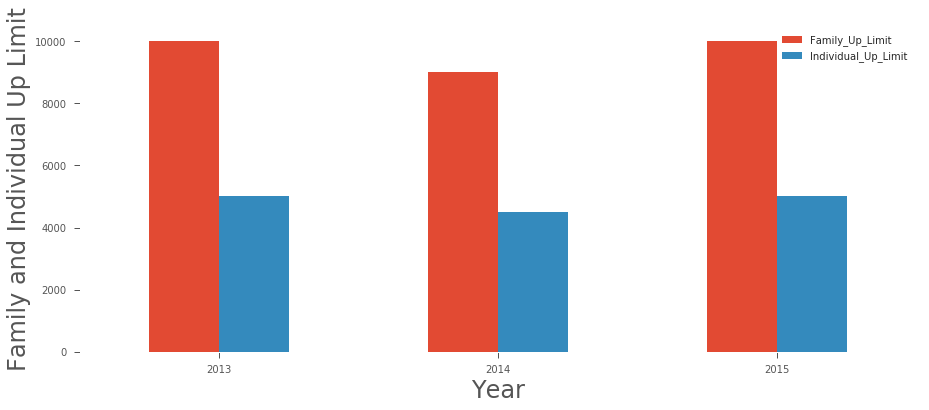

In [34]:
p = PlanAttributesData_1.groupby('year').median()[["Family_Up_Limit", "Individual_Up_Limit"]].plot(kind = 'bar', figsize = (15, 6), rot = 0)
_ = p.set_xlabel("Year"), p.set_ylabel("Family and Individual Up Limit"), p.legend(["Family_Up_Limit", "Individual_Up_Limit"])

Como observamos parece estável, não há uma grande variação de preço no mercado entre os 3 anos.

### Analise por Estados

Existem 50 estados nos Estados Unidos vamos analisar se a taxa é iguais em muitos estados.

Text(0.5,1,'Distribuição da taxa individual por código de estado \n para o conjunto de dados')

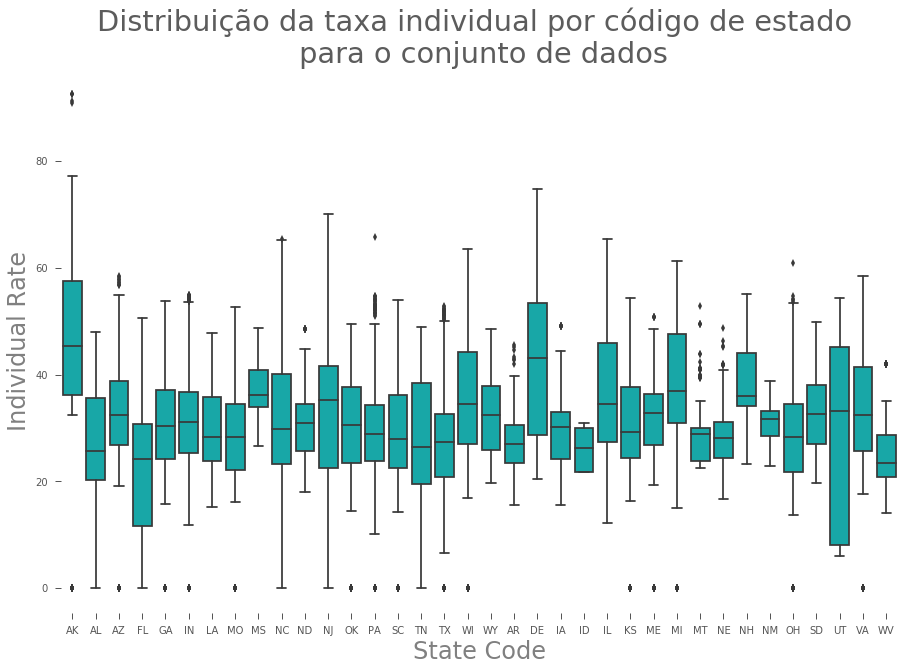

In [35]:
sns.boxplot(x="StateCode", y="IndividualRate", data=RateData_FO_3, color="c")

sns.despine(left=True, bottom=True)

plt.ylabel('Individual Rate', alpha=0.75)
plt.xlabel('State Code', alpha=0.75)
plt.title('Distribuição da taxa individual por código de estado \n para o conjunto de dados', alpha=0.75)

Como podemos ver a uma grande diferença entre os estados. As maiores diferenças estão no estados DE, AK e MS são bem altas. eu fiquei me perguntando porque isso? sera que as pessoas desses estados tem planos suficientes ou não tem muita concorrencia? 


Vou utilizar o GroupBy para fazer essa analise.

Text(0.5,1,'Distribuição do número de planos por estado')

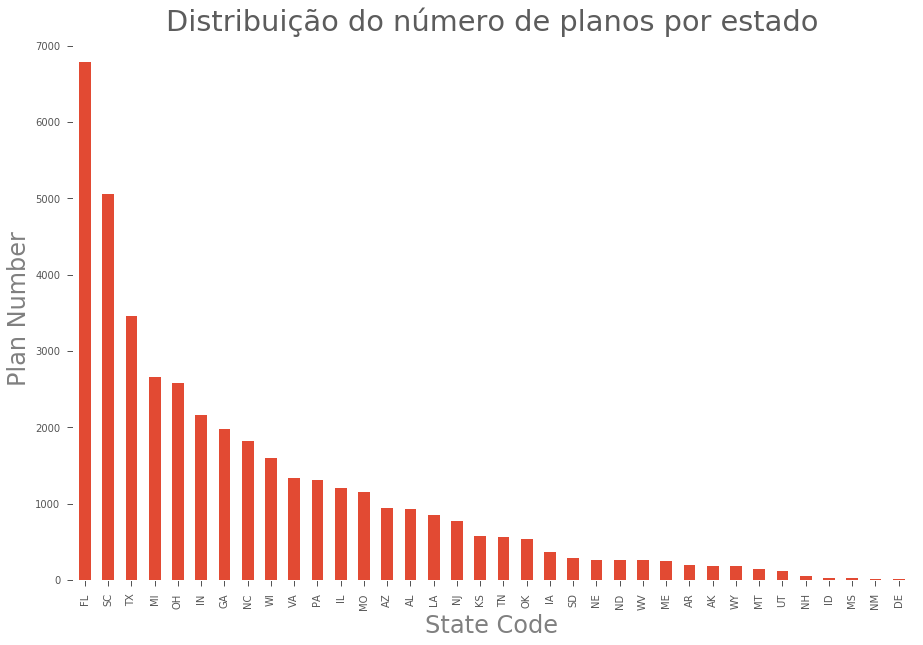

In [36]:
Plans_grouped = RateData_FO_3['PlanId'].groupby(RateData_FO_3['StateCode'])
Plans_grouped.count().sort_values(ascending=False).plot(kind='bar')
plt.ylabel('Plan Number', alpha=0.75)
plt.xlabel('State Code', alpha=0.75)
plt.title('Distribuição do número de planos por estado', alpha=0.75)

Analisando o gráfico podemos verificar que há menos planos sendo oferecidos nos estados DE, AK e MS. Podemos analisar também que o FL é o estado que tem mais concorrencia entre os planos de saúde. Dessa forma podemos analizar a importancia da concorrencia no mercado de saúde.

##### Além da quantidade de plano oferecidos, podemos analizar a taxa média em cada estado, dessa forma podemos confirmar se tem uma chance maior de tem menores taxas quando se trata de concorrencia entre os planos.

Agrupei o conjunto de dados por stateCode em valores médios


In [38]:
RateData_sub1 = RateData_FO_2.ix[:, [1,6,7,8,9,10]]
gr_statecode = RateData_sub1.groupby('StateCode').mean().reset_index()
gr_statecode.head(3)

,StateCode,IndividualRate,Couple,CoupleAndOneDependent,CoupleAndTwoDependents,CoupleAndThreeOrMoreDependents
0,AK,44.811828,73.486559,122.668871,138.857796,160.30000
1,AL,24.168707,39.482981,56.344541,73.207436,93.53563
2,AR,27.758827,46.289745,69.240918,92.193980,121.80352


Vou plotar 5 gráficos para analisar as taxas de cada plano por Região

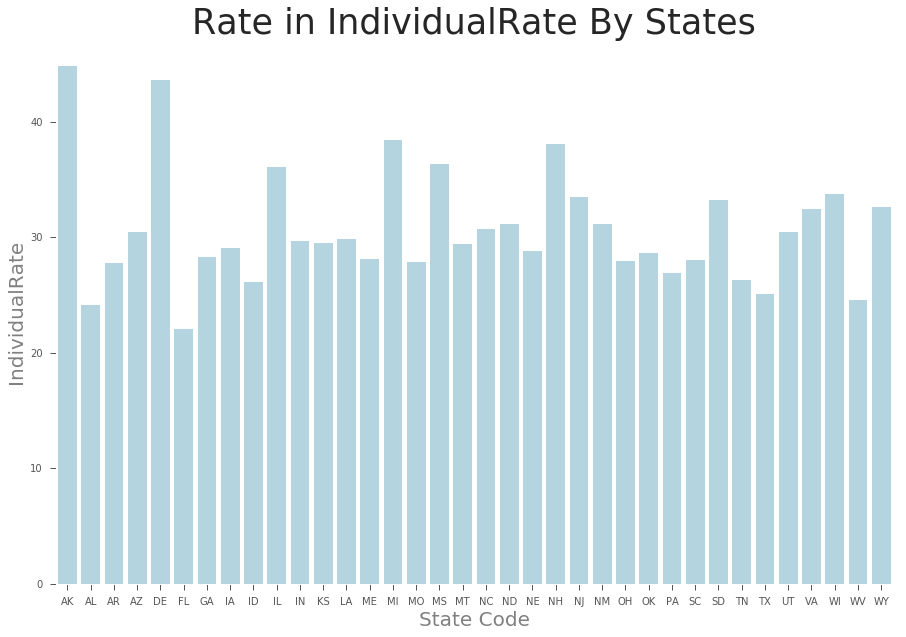

Figure: IndividualRate_By_State


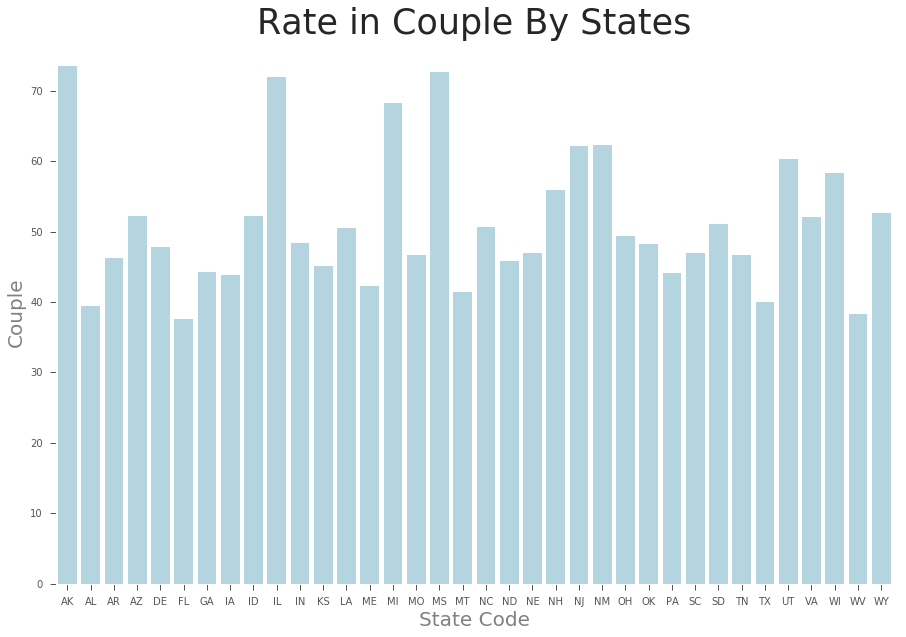

Figure: Couple_By_State


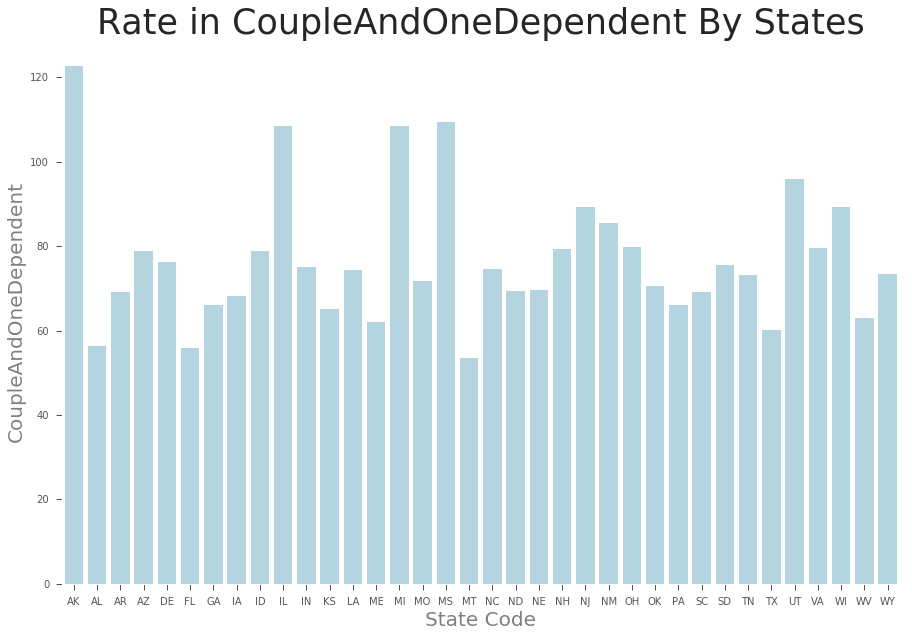

Figure: CoupleAndOneDependent_By_State


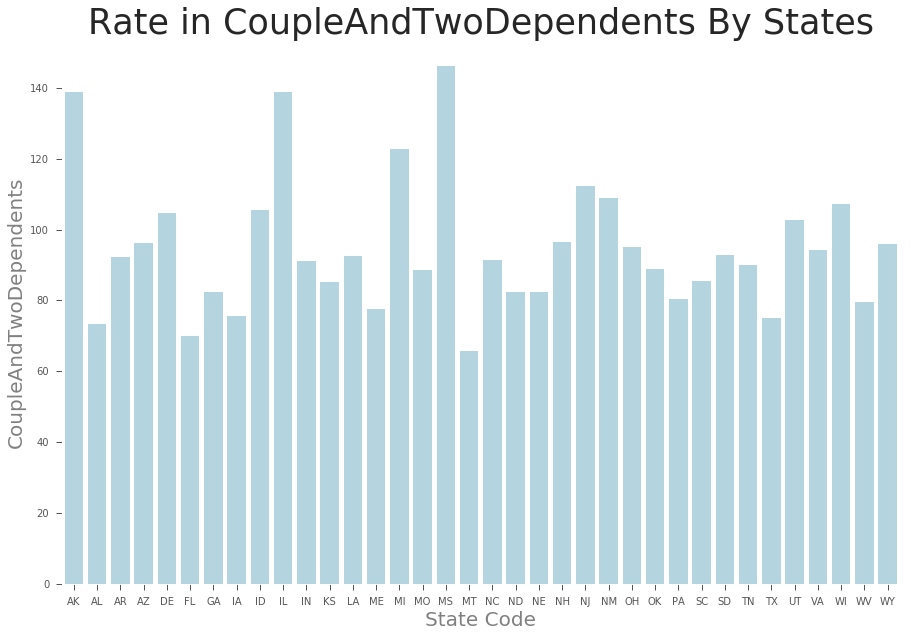

Figure: CoupleAndTwoDependents_By_State


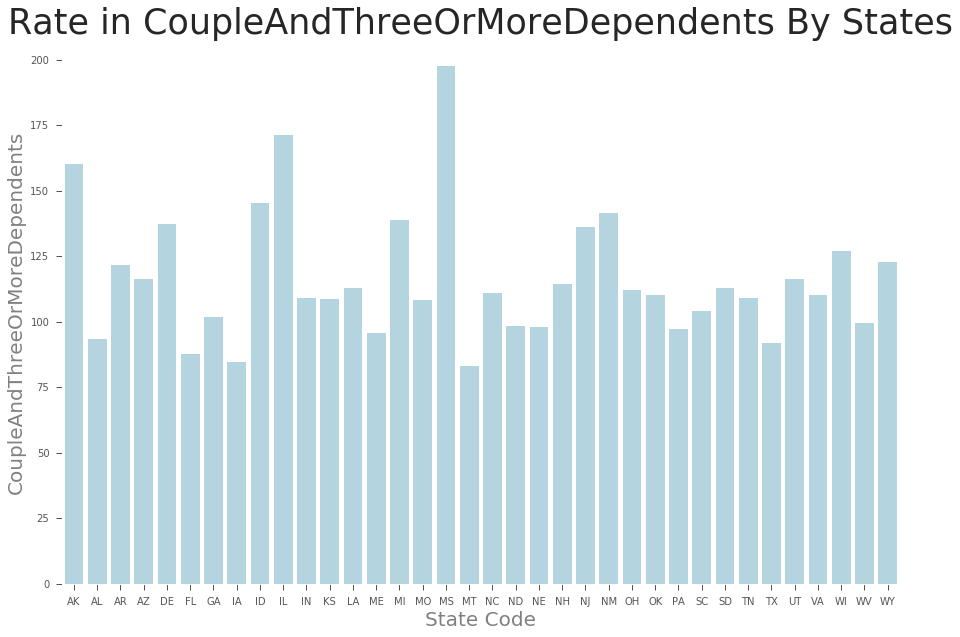

Figure: CoupleAndThreeOrMoreDependents_By_State


In [40]:
for x in gr_statecode.ix[:, 1:6].columns:
    sns.barplot(x="StateCode", y=x, data=gr_statecode, color='lightblue')
    plt.ylabel(x, alpha=0.75,fontsize=20)
    plt.xlabel('State Code', alpha=0.75, fontsize=20)
    plt.title("Rate in "+ x +" By States",fontsize=35)
    plt.show()
    print("Figure: "+ x + "_By_State")

###### Resumi dos gráficos

Analisando os gráficos notei que Ak, DE, MS e IL são os estados mais a maior taxa, sendo que o AK ficou em primeiro em: 
   ###### IndividualRate_By_State
   ###### Couple_By_State
   ###### CoupleAndOneDependent_By_State
   
O estado MS ficou em primeiro em: 

   ###### CoupleAndTwoDependents_By_State
   ###### CoupleAndThreeOrMoreDependents_By_State
   
Esses estados que atingiram os maiores picos tem menos concorrencia como falei anteriormente, já o estado FL manteve uma taxa média baixa em todos os gráficos. Dessa forma podemos determinar a influencia da concorrencia nos valores dos planos

Vamos calcular os valores medianos das taxas de cada estado

In [41]:
StateMedRate = RateData_FO_3.groupby('StateCode').median()
StateMedRate = StateMedRate.drop(StateMedRate[['BusinessYear','IssuerId']],1)
StateMedRate.head(3)

,IndividualRate,Couple,CoupleAndOneDependent,CoupleAndTwoDependents,CoupleAndThreeOrMoreDependents
StateCode,,,,,
AK,45.39,78.730,132.705,154.925,160.49
AL,25.70,37.985,58.445,77.865,105.05
AR,27.02,49.465,75.230,98.720,128.11


Podemos analisar a relação entre taxa individual e taxa familiar

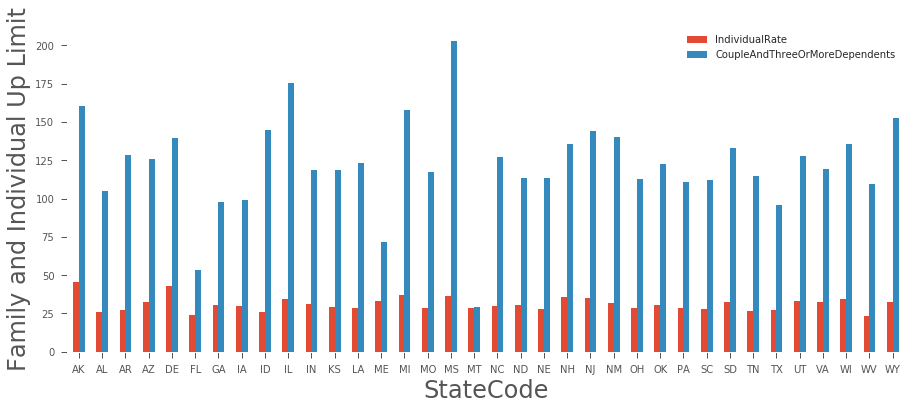

In [124]:
p = StateMedRate.groupby('StateCode').median()[["IndividualRate", "CoupleAndThreeOrMoreDependents"]].plot(kind = 'bar', figsize = (15, 6), rot = 0)
_ = p.set_xlabel("StateCode"), p.set_ylabel("Family and Individual Up Limit"), p.legend(["IndividualRate", "CoupleAndThreeOrMoreDependents"])

Analisando o gráfico podemos observar que a taxa individual está entre 25 a 30, já as taxas familiares está entre 100 a 150 a sua grande maioria. Isso nos mostra que os pais americanos tem um gasto grande em plano de saúde.

Para termos uma confirmação em relação as taxas vamos utilizar o CDE para confirmar

(0, 70)

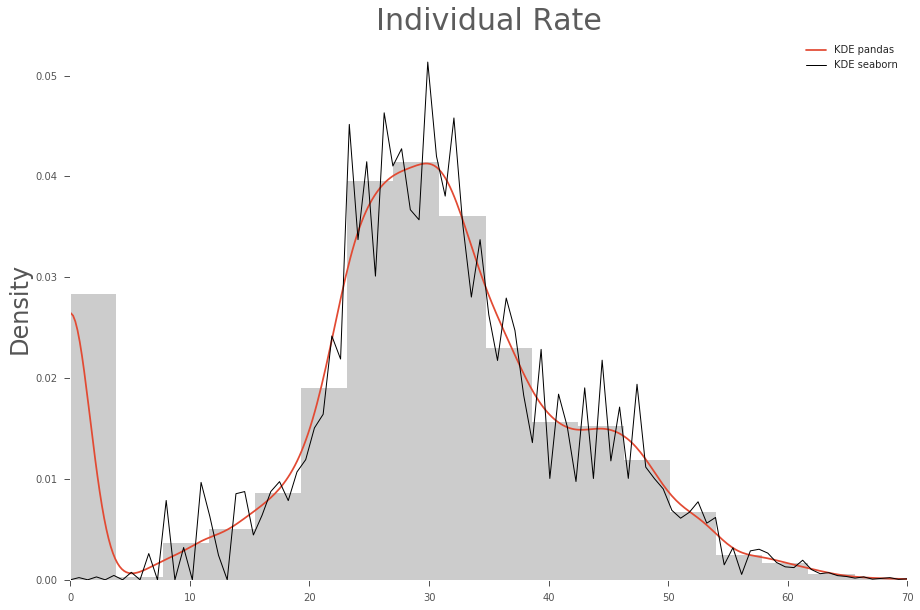

In [165]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(15,10))
RateData_FO_1.IndividualRate.hist(bins=24, normed=True, alpha=0.4, color='grey')
RateData_FO_1.IndividualRate.plot(kind='kde', title='Individual Rate', label='KDE pandas')
sns.kdeplot(RateData_FO_1.IndividualRate, bw=0.001, color='black', lw=1.0, label='KDE seaborn')
plt.title('Individual Rate', alpha=0.75, fontsize=30)
plt.xlim([0,70])

### Análise da Taxa por Ano

vou concentrar a minha analise na distribuição de dados no fator ano. Eu achei que os dados dos valores de '0' na coluna de taxa afetam fortemente o resultado (principalmente dados sobre planos de família, que é simplesmente porque o emissor não ofereceu o plano ou não foi publicado). Por isso, é necessário eliminar esses dados inválidos. dados.

In [166]:
RateData_droped=RateData_FO_2.drop(RateData_FO_2[RateData_FO_2.Couple == 0].index)
RateData_droped.head(5)

,BusinessYear,StateCode,IssuerId,ImportDate,PlanId,Age,IndividualRate,Couple,CoupleAndOneDependent,CoupleAndTwoDependents,CoupleAndThreeOrMoreDependents
1,2014,AK,21989,2014-03-19 07:06:49,21989AK0020001,Family Option,36.95,73.9,144.56,144.56,144.56
2,2014,AK,21989,2014-03-19 07:06:49,21989AK0020001,Family Option,36.95,73.9,144.56,144.56,144.56
5,2014,AK,21989,2014-03-19 07:06:49,21989AK0020001,Family Option,36.95,73.9,144.56,144.56,144.56
6,2014,AK,21989,2014-03-19 07:06:49,21989AK0020002,Family Option,32.45,64.9,126.95,126.95,126.95
9,2014,AK,21989,2014-03-19 07:06:49,21989AK0020002,Family Option,32.45,64.9,126.95,126.95,126.95


#### Agrupando ano

pude encontrar informações de acordo com os fatos do ano comercial e da área, por exemplo. qual ano tem a menor taxa em estado específico?
Para exibir mais detalhes, considerei o fato da área (StateCode) também.

In [172]:
Year_2014 = RateData_droped[RateData_droped['BusinessYear'] == 2014]

In [101]:
Year_2014 = RateData_droped[RateData_droped['BusinessYear'] == 2015]

In [167]:
Year_2014 = RateData_droped[RateData_droped['BusinessYear'] == 2016]

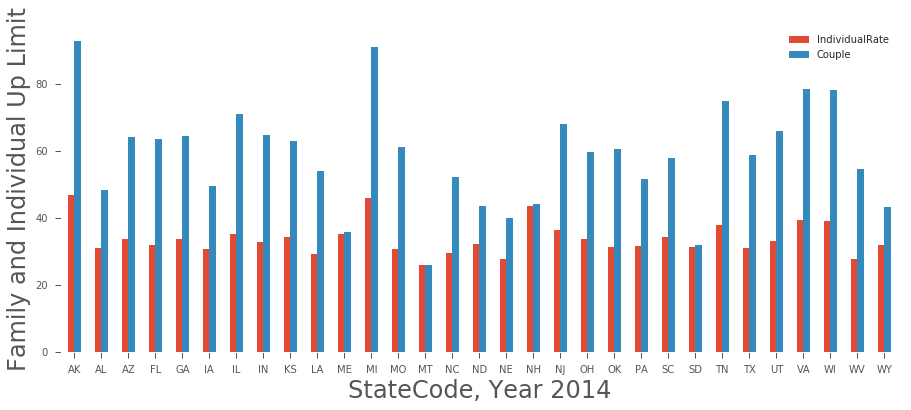

In [105]:
p = Year_2014.groupby('StateCode').median()[["IndividualRate", "Couple"]].plot(kind = 'bar', figsize = (15, 6), rot = 0)
_ = p.set_xlabel("StateCode, Year 2014"), p.set_ylabel("Family and Individual Up Limit"), p.legend(["IndividualRate", "Couple"])

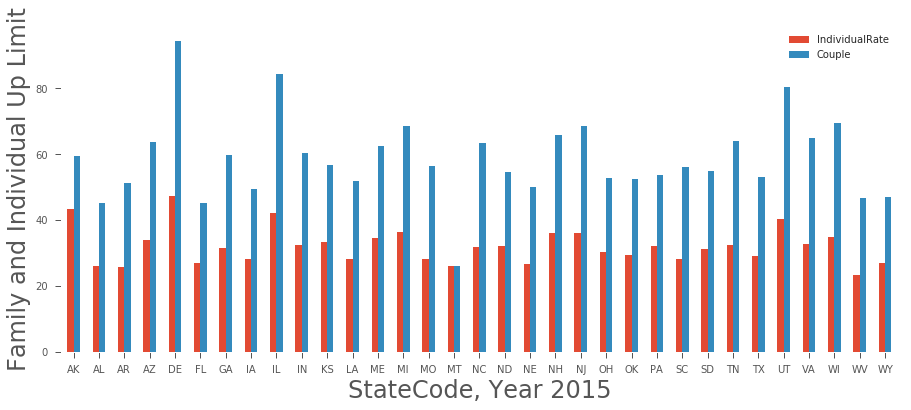

In [106]:
p = Year_2015.groupby('StateCode').median()[["IndividualRate", "Couple"]].plot(kind = 'bar', figsize = (15, 6), rot = 0)
_ = p.set_xlabel("StateCode, Year 2015"), p.set_ylabel("Family and Individual Up Limit"), p.legend(["IndividualRate", "Couple"])

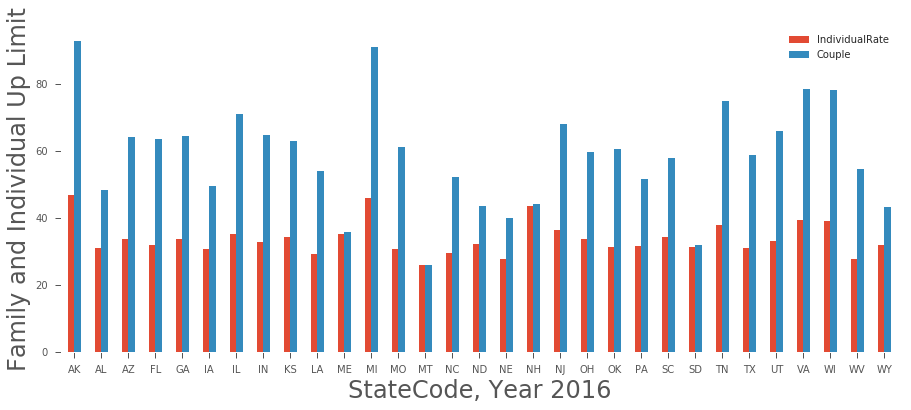

In [107]:
p = Year_2016.groupby('StateCode').median()[["IndividualRate", "Couple"]].plot(kind = 'bar', figsize = (15, 6), rot = 0)
_ = p.set_xlabel("StateCode, Year 2016"), p.set_ylabel("Family and Individual Up Limit"), p.legend(["IndividualRate", "Couple"])

##### Resumo
Os gráficos acima mostraram a relação entre a taxa individual e Familiar de forma clara. Podemos responder a pergunta feita anteriormente.
Por exemplo, do estado = AK, saberíamos que o ano 2016 tem a menor taxa de Dependentes Casal, Três Ou Mais, e 2014 tem a menor taxa individual no Alasca (AK). E essa tendência parece se aplicar à maioria dos estados.

### Conclusão

Os dados deste relatório são do CMS. Tentei analisar o conjunto de dados e previmos alguns problemas. E encontramos uma conclusão útil:

1. Utilizei o KDE e o CDF para encontrar a distribuição dos limites de custos das famílias que pagam com seu próprio dinheiro.
2. Analisei os dados do Ano Comercial por GROUPBY e descobri que não há grande flutuação de preço no mercado de seguros dos EUA nesses três anos.
3. Analisei as taxas de estado e descobri que há menos escolhas de planos nos estados DE, AK e MS, cujas taxas são muito mais caras. Você pode descobrir porque a competição é muito importante no mercado de seguro de saúde.
4. Analisamos as taxas do Ano Comercial e descobrimos que o ano de 2016 tem a menor taxa de Dependentes Casal-E-Três Ou Mais, e 2014 tem a menor taxa individual no Alasca (AK). E essa tendência parece se aplicar à maioria dos estados.